In [2]:
import fastf1
import fastf1.plotting
import numpy as np
import matplotlib.pyplot as plt

In [3]:
session = fastf1.get_session(2019, "Monza", "Q")
session.load()
leclerc_fast = session.laps.pick_drivers('LEC').pick_fastest()
lec_car_data = leclerc_fast.get_car_data().add_distance()

req         WARNING 	DEFAULT CACHE ENABLED! (157.41 MB) /Users/emccauley6/Library/Caches/fastf1
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '44', '77', '5', '3', '27', '55', '23', '18', '7', '99', '20', '26', '4', '10', '8', '11', '63', '88', '33']


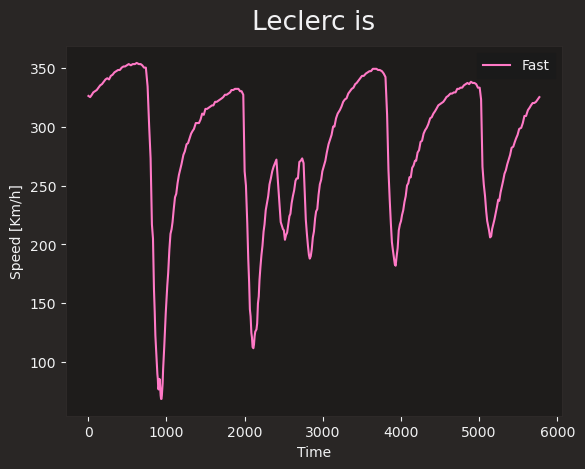

In [4]:
fastf1.plotting.setup_mpl(color_scheme="fastf1")
t_lec = lec_car_data["Distance"]
vCar_lec = lec_car_data['Speed']
fig, ax = plt.subplots()
ax.plot(t_lec, vCar_lec, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc is')
ax.legend()
plt.show()

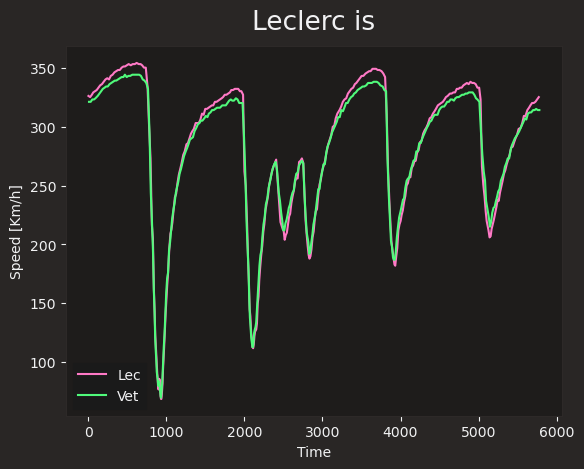

In [5]:
vettel_fast = session.laps.pick_drivers('VET').pick_fastest()
vet_car_data = vettel_fast.get_car_data().add_distance()
t_vet = vet_car_data['Distance']
vCar_vet = vet_car_data['Speed']
fig, ax1 = plt.subplots()
ax1.plot(t_lec, vCar_lec, label='Lec')
ax1.plot(t_vet, vCar_vet, label='Vet')
ax1.set_xlabel('Time')
ax1.set_ylabel('Speed [Km/h]')
ax1.set_title('Leclerc is')
ax1.legend()
plt.show()

no data


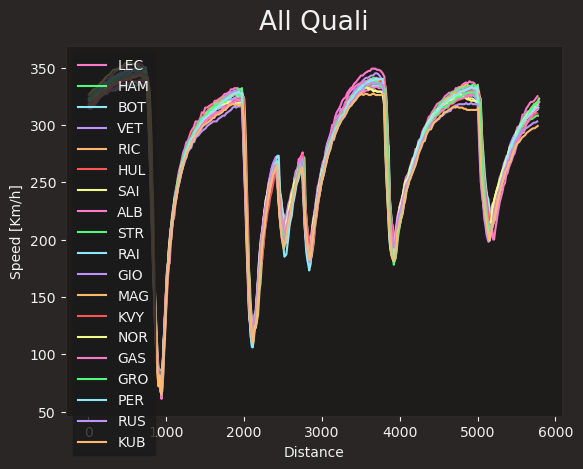

In [6]:
drivers = [session.get_driver(i)["Abbreviation"] for i in session.drivers]
session_results = {}
for driver in drivers:
    try:
        driver_fastest = session.laps.pick_drivers(driver).pick_fastest()
        driver_fastest = driver_fastest.get_car_data().add_distance()
        t = driver_fastest['Distance']
        vCar = driver_fastest["Speed"]
        session_results[driver] = [t, vCar]
    except:
        print("no data")
fig, ax1 = plt.subplots()
for key in session_results.keys():
    data = session_results[key]
    ax1.plot(data[0], data[1], label=key)
ax1.set_xlabel('Distance')
ax1.set_ylabel('Speed [Km/h]')
ax1.set_title('All Quali')
ax1.legend()
plt.show()

In [7]:
session_bahrain_2024 = fastf1.get_session(2024, "Bahrain", "R")
session_bahrain_2024.load(telemetry=False, weather=False)

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']


req            INFO 	Using cached data for driver_info


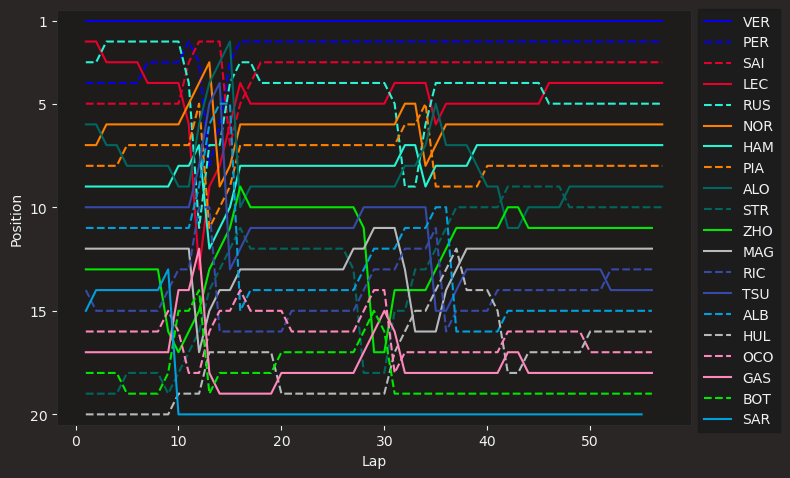

In [8]:
fig, ax = plt.subplots(figsize=(8.0, 4.9))
for drv in session_bahrain_2024.drivers:
    drv_laps = session_bahrain_2024.laps.pick_drivers(drv)
    abb = drv_laps['Driver'].iloc[0]
    
    style = fastf1.plotting.get_driver_style(identifier=abb, style=['color', 'linestyle'], session=session_bahrain_2024)
    ax.plot(drv_laps['LapNumber'], drv_laps["Position"], label=abb, **style)
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()

# try to map race lap times

In [9]:
session_bahrain_2024.laps.pick_drivers("VER")


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:01:37.489000,VER,1,0 days 00:01:37.284000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.266000,...,False,Red Bull Racing,0 days 00:59:59.911000,NaT,12,1.0,False,,False,False
1,0 days 01:03:13.785000,VER,1,0 days 00:01:36.296000,2.0,1.0,NaT,NaT,0 days 00:00:30.916000,0 days 00:00:41.661000,...,False,Red Bull Racing,0 days 01:01:37.489000,NaT,1,1.0,False,,False,True
2,0 days 01:04:50.538000,VER,1,0 days 00:01:36.753000,3.0,1.0,NaT,NaT,0 days 00:00:30.999000,0 days 00:00:41.966000,...,False,Red Bull Racing,0 days 01:03:13.785000,NaT,1,1.0,False,,False,True
3,0 days 01:06:27.185000,VER,1,0 days 00:01:36.647000,4.0,1.0,NaT,NaT,0 days 00:00:30.931000,0 days 00:00:41.892000,...,False,Red Bull Racing,0 days 01:04:50.538000,NaT,1,1.0,False,,False,True
4,0 days 01:08:04.358000,VER,1,0 days 00:01:37.173000,5.0,1.0,NaT,NaT,0 days 00:00:31.255000,0 days 00:00:42.056000,...,False,Red Bull Racing,0 days 01:06:27.185000,NaT,1,1.0,False,,False,True
5,0 days 01:09:41.450000,VER,1,0 days 00:01:37.092000,6.0,1.0,NaT,NaT,0 days 00:00:31.041000,0 days 00:00:42.187000,...,False,Red Bull Racing,0 days 01:08:04.358000,NaT,1,1.0,False,,False,True
6,0 days 01:11:18.488000,VER,1,0 days 00:01:37.038000,7.0,1.0,NaT,NaT,0 days 00:00:31.015000,0 days 00:00:42.118000,...,False,Red Bull Racing,0 days 01:09:41.450000,NaT,1,1.0,False,,False,True
7,0 days 01:12:55.512000,VER,1,0 days 00:01:37.024000,8.0,1.0,NaT,NaT,0 days 00:00:31.041000,0 days 00:00:42.077000,...,False,Red Bull Racing,0 days 01:11:18.488000,NaT,1,1.0,False,,False,True
8,0 days 01:14:32.741000,VER,1,0 days 00:01:37.229000,9.0,1.0,NaT,NaT,0 days 00:00:31.100000,0 days 00:00:42.166000,...,False,Red Bull Racing,0 days 01:12:55.512000,NaT,1,1.0,False,,False,True
9,0 days 01:16:09.701000,VER,1,0 days 00:01:36.960000,10.0,1.0,NaT,NaT,0 days 00:00:30.986000,0 days 00:00:42.009000,...,False,Red Bull Racing,0 days 01:14:32.741000,NaT,12,1.0,False,,False,True


/var/folders/8q/pd8bhfh923x7_5hc541qy_8c0000gn/T/ipykernel_89540/2994601198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drv_laps['LapTimeSeconds'] = drv_laps['LapTime'].dt.total_seconds()


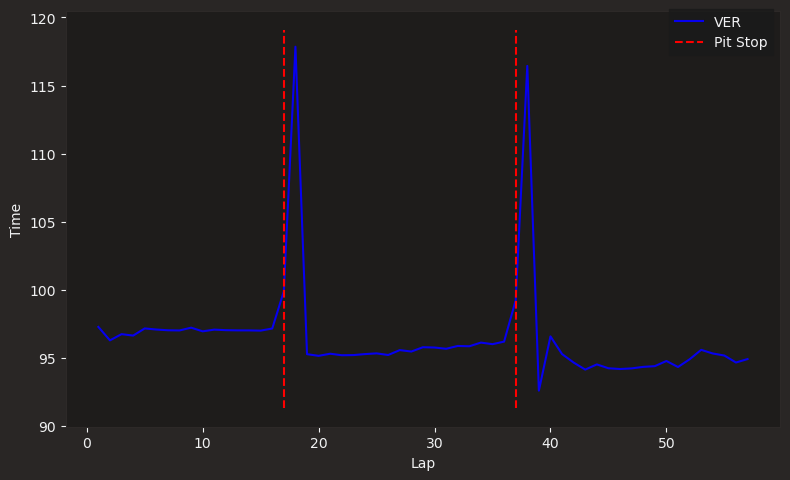

In [10]:
fig, ax = plt.subplots(figsize=(8.0, 4.9))
drv = "VER"
drv_laps = session_bahrain_2024.laps.pick_drivers(drv)
drv_laps['LapTimeSeconds'] = drv_laps['LapTime'].dt.total_seconds()
abb = drv_laps['Driver'].iloc[0]

accurate_laps = drv_laps[drv_laps['IsAccurate'] == True]
pit_laps = drv_laps[drv_laps['PitInTime'].notnull()]['LapNumber']

style = fastf1.plotting.get_driver_style(identifier=abb, style=['color', 'linestyle'], session=session_bahrain_2024)
ax.plot(drv_laps['LapNumber'], drv_laps["LapTimeSeconds"], label=abb, **style)

ymin, ymax = ax.get_ylim()
ax.vlines(x=pit_laps, ymin=ymin, ymax=ymax, color='red', lw=1.5, linestyle='--', label='Pit Stop')
ax.set_xlabel('Lap')
ax.set_ylabel('Time')

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()